In [1]:
#import statements
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

In [2]:
#Loading data into pandas
data_user = pd.read_table('u.user', header=None, sep="|")
data_user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip code']
data_udata = pd.read_table('u.data', header=None, delim_whitespace=True)
data_udata.columns = ['user_id', 'item id', 'rating', 'timestamp']
print(data_user)

     user_id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
10        11   39      F          other    30329
11        12   28      F          other    06405
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
17        18   35      F          other    37212
18        19   40      M      librarian    02138
19        20   42   

In [3]:
print(data_udata)

       user_id  item id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
5          298      474       4  884182806
6          115      265       2  881171488
7          253      465       5  891628467
8          305      451       3  886324817
9            6       86       3  883603013
10          62      257       2  879372434
11         286     1014       5  879781125
12         200      222       5  876042340
13         210       40       3  891035994
14         224       29       3  888104457
15         303      785       3  879485318
16         122      387       5  879270459
17         194      274       2  879539794
18         291     1042       4  874834944
19         234     1184       2  892079237
20         119      392       4  886176814
21         167      486       4  892738452
22         

### Distribution of age group

In [4]:
data = [go.Histogram(x = data_user.age)]
layout = dict(xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Frequency'),
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Age histogram')

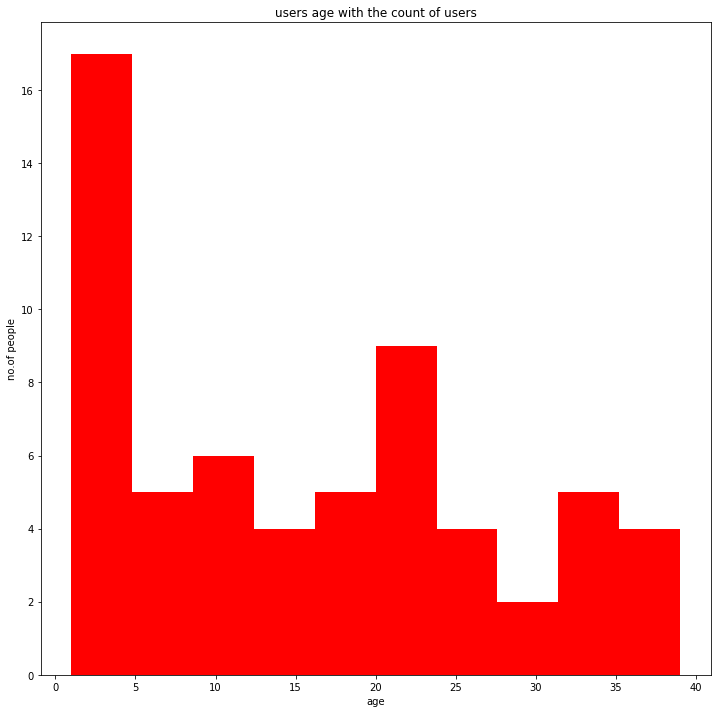

In [5]:
#finding the count of people of different ages
df_user_age = data_user.groupby(['age']).user_id.count().plot(kind='hist', color = 'r', figsize = (12,12))
plt.xlabel('age')
plt.ylabel('no.of people')
plt.title('users age with the count of users')
plt.show()

### Rating Histogram

In [6]:
data = [go.Histogram(x = data_udata.rating)]
layout = dict(xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Frequency'),
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Rating histogram')

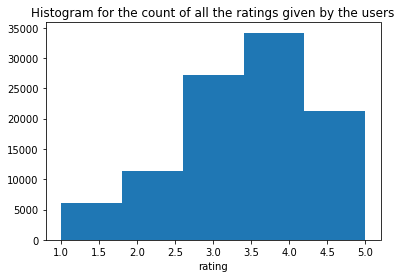

In [7]:
#finding the count of total ratings given by different users
plt.hist(data_udata['rating'],bins = 5)
plt.xlabel('rating')
plt.title('Histogram for the count of all the ratings given by the users')
plt.show()

In [8]:
#merging dataframes data_user and data_udata
df_merged_user_udata = pd.merge(data_user, data_udata, on = 'user_id', how = 'outer')
#removing unwanted columns
df_merged_user_udata.drop(['zip code'], axis = 1, inplace = True)
print(df_merged_user_udata)

       user_id  age gender  occupation  item id  rating  timestamp
0            1   24      M  technician       61       4  878542420
1            1   24      M  technician      189       3  888732928
2            1   24      M  technician       33       4  878542699
3            1   24      M  technician      160       4  875072547
4            1   24      M  technician       20       4  887431883
5            1   24      M  technician      202       5  875072442
6            1   24      M  technician      171       5  889751711
7            1   24      M  technician      265       4  878542441
8            1   24      M  technician      155       2  878542201
9            1   24      M  technician      117       3  874965739
10           1   24      M  technician       47       4  875072125
11           1   24      M  technician      222       4  878873388
12           1   24      M  technician      253       5  874965970
13           1   24      M  technician      113       5  87854

### occupation vs avg rating

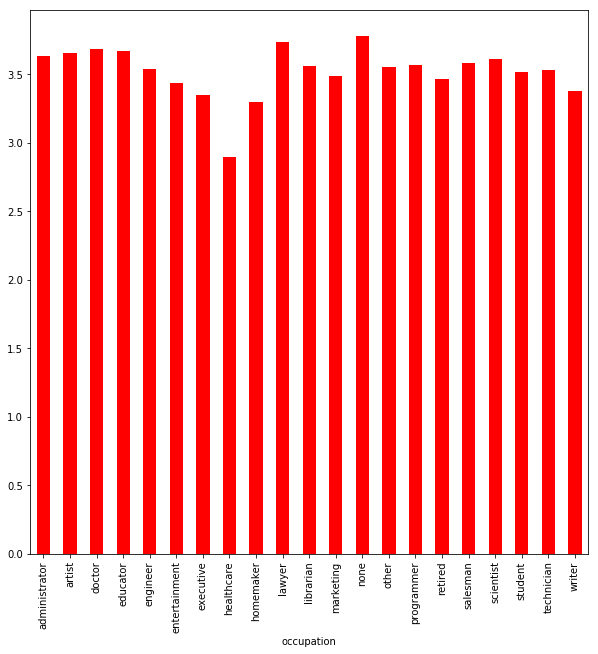

In [9]:
occupation_rating = df_merged_user_udata.groupby(['occupation']).rating.mean().plot(kind = 'bar', color='r', figsize=(10,10))

In [10]:
occupation_rating = pd.DataFrame(df_merged_user_udata.groupby(['occupation']).rating.mean(), index = None)

trace0 = Bar(
        x = occupation_rating.index,
        y = occupation_rating.rating,
        
)
data = [trace0]
layout = dict(xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Average Rating'),
              barmode='group'
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Average rating vs occupation')

### average rating over the year

In [11]:
u_data = data_udata.copy()
u_data['timestamp'] = pd.to_datetime(u_data['timestamp'],unit='s')
u_data['Date'] = pd.DatetimeIndex(u_data['timestamp']).date
u_data.head()

,user_id,item id,rating,timestamp,Date
0,196,242,3,1997-12-04 15:55:49,1997-12-04
1,186,302,3,1998-04-04 19:22:22,1998-04-04
2,22,377,1,1997-11-07 07:18:36,1997-11-07
3,244,51,2,1997-11-27 05:02:03,1997-11-27
4,166,346,1,1998-02-02 05:33:16,1998-02-02


In [12]:
Average_rating_Date = pd.DataFrame(u_data.groupby(['Date']).rating.mean(), index=None)

In [13]:
trace0 = Scatter(
        x = Average_rating_Date.index,
        y = Average_rating_Date.rating,
        #mode = 'markers'
)
data = [trace0]
layout = dict(xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Average Rating'),
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Rating histogram')

In [14]:
#years = pd.to_datetime(df_merged_user_udata['timestamp'],unit = 's')
years = pd.to_datetime(data_udata['timestamp'],unit = 's')
year = years.dt.year

In [15]:
#df_merged_user_udata['year'] = year
data_udata['year'] = year
data_udata

,user_id,item id,rating,timestamp,year
0,196,242,3,881250949,1997
1,186,302,3,891717742,1998
2,22,377,1,878887116,1997
3,244,51,2,880606923,1997
4,166,346,1,886397596,1998
5,298,474,4,884182806,1998
6,115,265,2,881171488,1997
7,253,465,5,891628467,1998
8,305,451,3,886324817,1998
9,6,86,3,883603013,1997


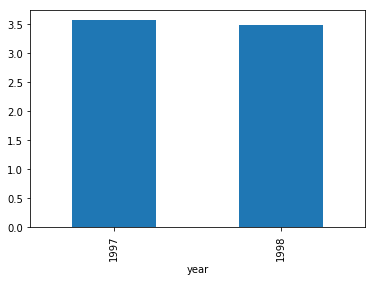

In [16]:
data_udata.groupby('year').rating.mean().plot(kind = 'bar')

### stacked bar plot

In [17]:
#df_age_rating = df_merged_user_udata.groupby(['age','gender']).rating.mean().plot(kind = 'bar',stacked = True, figsize = (16,16))
df_age_rating = df_merged_user_udata.groupby(['age','gender']).rating.mean()
df_age_rating = df_age_rating.unstack()
df_age_rating.reset_index(inplace = True)
df_age_rating

gender,age,F,M
0,7,NaN,3.767442
1,10,NaN,3.387097
2,11,NaN,2.925926
3,13,3.144928,3.523364
4,14,3.375000,NaN
5,15,3.415094,2.962121
6,16,3.690476,3.211155
7,17,3.471698,3.522124
8,18,3.805375,3.593860
9,19,3.314574,3.422191


In [18]:
df_age_rating['status'] = pd.cut(df_age_rating['age'], bins=[6, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)
df_age_rating

gender,age,F,M,status
0,7,NaN,3.767442,0
1,10,NaN,3.387097,0
2,11,NaN,2.925926,1
3,13,3.144928,3.523364,1
4,14,3.375000,NaN,1
5,15,3.415094,2.962121,1
6,16,3.690476,3.211155,1
7,17,3.471698,3.522124,1
8,18,3.805375,3.593860,1
9,19,3.314574,3.422191,1


In [19]:

labels = np.array('7-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80'.split())


In [20]:
df_age_rating['status'] = labels[df_age_rating['status']]
df_age_rating

gender,age,F,M,status
0,7,NaN,3.767442,7-10
1,10,NaN,3.387097,7-10
2,11,NaN,2.925926,11-20
3,13,3.144928,3.523364,11-20
4,14,3.375000,NaN,11-20
5,15,3.415094,2.962121,11-20
6,16,3.690476,3.211155,11-20
7,17,3.471698,3.522124,11-20
8,18,3.805375,3.593860,11-20
9,19,3.314574,3.422191,11-20


In [21]:
df_age_rating1 = pd.DataFrame(df_age_rating.groupby(['status']).mean(), index =None)

In [22]:
df_age_rating1.head()
df_age_rating1.index

Index(['11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '7-10', '71-80'], dtype='object', name='status')

In [23]:
trace0 = Bar(
            x = df_age_rating1.index,
            y = df_age_rating1.M,
            name = 'Male'
            )
trace1 = Bar(
            x = df_age_rating1.index,
            y = df_age_rating1.F,
            name = 'Female')
data = [trace0 , trace1]
layout = dict(xaxis = dict(title = 'Age Range'),
              yaxis = dict(title = 'Ratings'),
              barmode = 'stack')
fig = dict(data = data, layout = layout)
plot.iplot(fig, 'Gender ratings Age analysis')

